**Multivariate Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
np.random.seed(50)
rng = np.random.RandomState(123)

    Multiple Linear Regression holds the following assumptions:
    - A linear relationship between the dependent and independent variables (checked using a scatterplot). If non-linear then a transformation must 
      be implemented to get linearity or a non-linear regression must be implemented.

    - The independent variables are not highly correlated amongst themselves. Problems of finding specific variable which leads to variance in 
      dependent variable will arise. Variance Inflation Factor method can be used to test correlation.

    - The variance of the residuals i.e. the error term, is constant (homoscedasticity).
    
    - The observations are independent. To test for this assumption, we use the Durbin Watson statistic. The test will show values from 0 to 4, where 
      a value of 0 to 2 shows positive autocorrelation, and values from 2 to 4 show negative autocorrelation. The mid-point, i.e., a value of 2, shows 
      that there is no autocorrelation.

    - Multivariate normality: residuals are normally distributed. It can also be tested using two main methods; a histogram with a superimposed 
      normal curve or the Normal Probability Plot method.

    If two variables a linearly relationship, then their logarithm is also linearly related.

In [ ]:
# import dataset
house = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# inspect dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# drop id and date columns
house = house.drop(['id', 'date'], axis=1)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


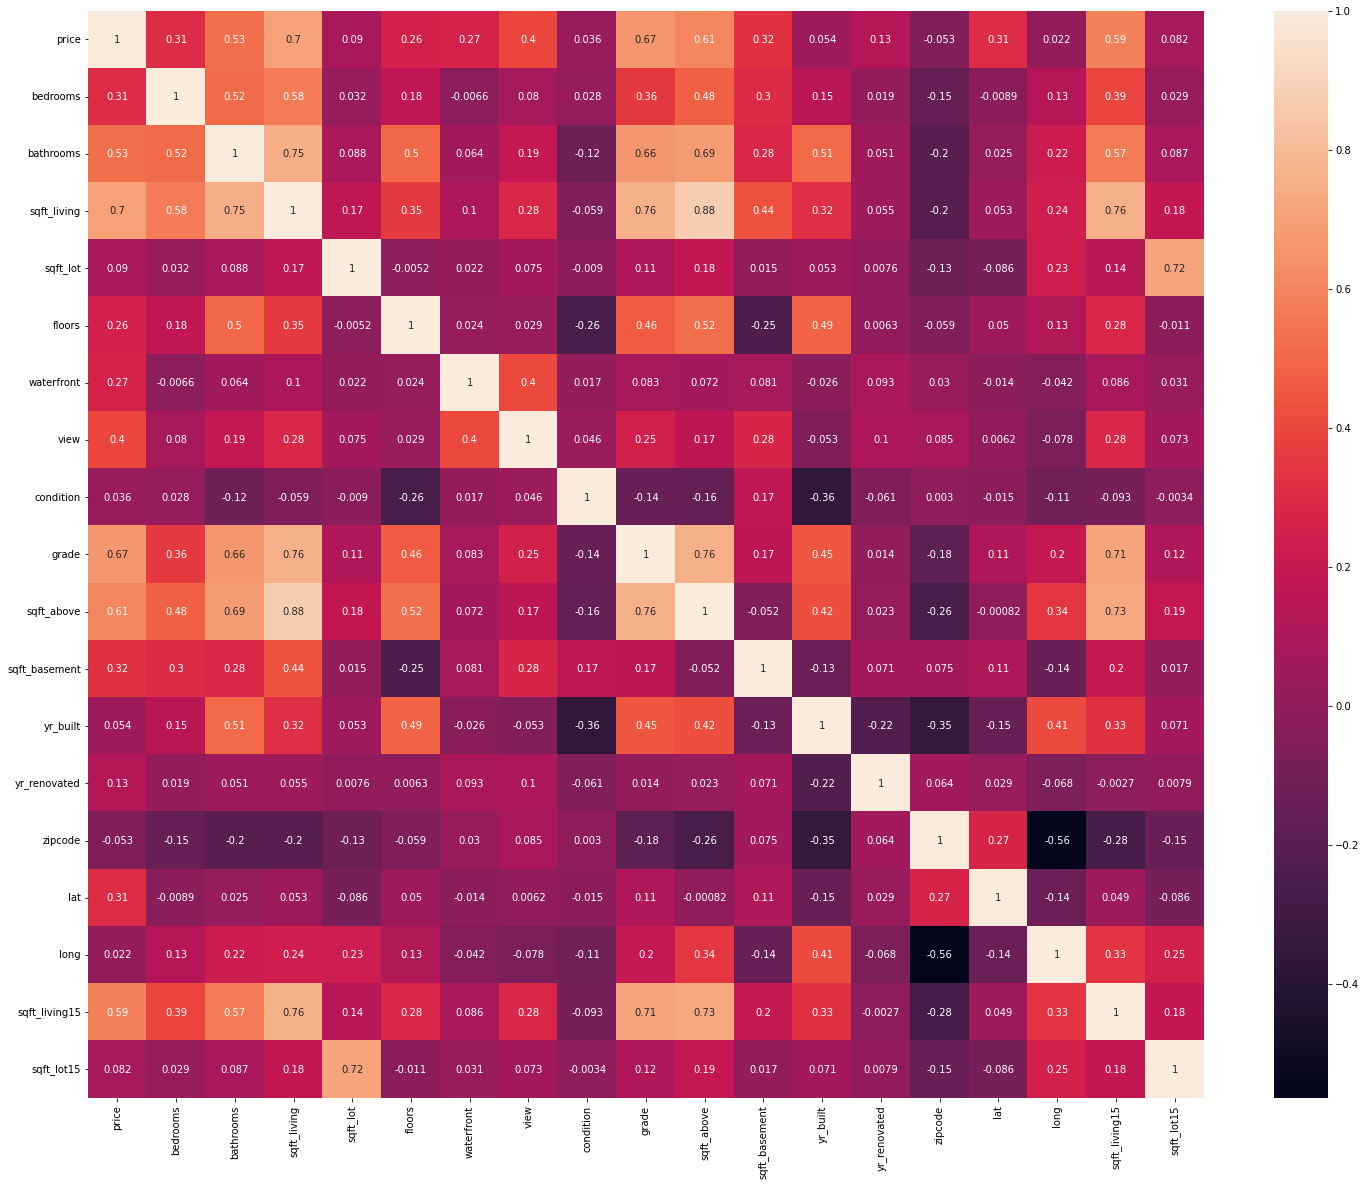

In [ ]:
# check correlation amongst variables.
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(house.corr(), annot=True)
plt.show;

    No correlation is greater than 0.9, therefore we use all the variables.

In [ ]:
# remove the target variable
y = house.pop('price')
X = house
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [ ]:
# split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18110,3,1.75,1060,8100,2.0,0,0,4,7,1060,0,1983,0,98038,47.3617,-122.047,1410,8100
19399,3,2.00,2120,4080,2.0,0,0,3,7,2120,0,2003,0,98053,47.6820,-122.037,2280,4080
5502,3,1.75,1830,5120,1.5,0,2,5,8,1830,0,1903,0,98122,47.6051,-122.311,2120,5120
1480,4,2.50,2341,9594,2.0,0,0,3,9,2341,0,1997,0,98052,47.6993,-122.115,2850,9421
10471,3,1.75,1360,5445,1.0,0,0,4,7,1360,0,1957,0,98008,47.6071,-122.123,1570,7840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,3,2.00,1850,8208,1.0,0,0,4,7,1180,670,1970,0,98023,47.3109,-122.362,1790,8174
7291,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
17728,4,1.50,1580,10260,1.0,0,0,4,7,1030,550,1955,0,98007,47.5984,-122.147,1520,7000
7293,3,2.00,1410,6600,1.0,0,0,4,7,1410,0,1990,0,98042,47.3596,-122.089,1750,7150


In [ ]:
# define the variable parameters
n = X_train.shape[1] + 1           # the number of features plus the intercept

params = tf.Variable(rng.randn(n,), np.float32)

In [ ]:
# transform the X_train to be acceptable to the functions
train_set = X_train.T.values

In [ ]:
# define the multivariate linear regression model
def linear_regression(params, features):

  total = params[0]        # intercept

  for num in range(0, features.shape[0]):
    total += (features[num] * params[num+1])

  return total     # predictions

In [ ]:
# define the loss function
def loss_function(params, train_data, targets=y_train):

  # Set the predicted values
  predictions = linear_regression(params, train_data)

  # Use the mean absolute error loss
  return keras.losses.mae(targets, predictions)

In [ ]:
# Define the optimize operation
opt = keras.optimizers.Adam()

In [ ]:
def print_results(params):

  # Set the predicted values
  predictions = linear_regression(params, train_set)

  print(keras.losses.mae(y_train, predictions), params)

In [ ]:
# Perform minimization and print trainable variables
loss_list = []

for j in range(1000000):
  opt.minimize(lambda: loss_function(params, train_set), var_list=[params])
  

  loss_list.append((loss_function(params, train_set), params, j))
  
 
  # develop a stopping criteria.
  if len(loss_list) >= 1000:
    if loss_list[-4][0]>loss_list[-3][0]>loss_list[-2][0]>loss_list[-1][0]:
      loss_list = loss_list[1:]
      last_elem = loss_list[-1][0]
      min_idx = j
    elif loss_list[-1][0]>loss_list[-2][0]>loss_list[-3][0]>loss_list[-4][0] or\
    ((j - min_idx) >= 4 and (loss_list[-4][0] >= last_elem) and (loss_list[-3][0] >= last_elem)\
     and (loss_list[-2][0] >= last_elem) and (loss_list[-1][0] >= last_elem)):
      break

result = pd.DataFrame(loss_list)
result.columns = ['loss', 'parameters', 'idx']
results = result.sort_values(by=['loss'], ascending=True)
results

,loss,parameters,idx
81327,"tf.Tensor(159408.610188629, shape=(), dtype=fl...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392390
81328,"tf.Tensor(159408.6122408217, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392391
81329,"tf.Tensor(159408.6136676117, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392392
81330,"tf.Tensor(159408.61473540633, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392393
81324,"tf.Tensor(159408.62070594865, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392387
...,...,...,...
6,"tf.Tensor(159794.79981878988, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",311069
3,"tf.Tensor(159794.80692695687, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",311066
1,"tf.Tensor(159794.8087396746, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",311064
2,"tf.Tensor(159794.80885724115, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",311065


In [82]:
pd.concat([results.iloc[0,].to_frame().T, results.iloc[0,].to_frame().T], axis=0)

,loss,parameters,idx
81327,"tf.Tensor(159408.610188629, shape=(), dtype=fl...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392390
81327,"tf.Tensor(159408.610188629, shape=(), dtype=fl...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",392390


In [66]:
results.loc[0,'parameters']

<tf.Variable 'Variable:0' shape=(19,) dtype=float64, numpy=
array([-8.12206078e+01, -2.78356206e+02,  3.92888778e+02,  8.32069786e+01,
        3.23970753e-02,  3.96681828e+02,  3.96288934e+02,  3.97641761e+02,
        3.93261189e+02,  3.93848282e+02,  6.82560266e+01,  9.03738609e+01,
       -3.64922494e+02,  5.08377527e+01,  6.71536674e+00,  3.78367897e+02,
       -1.31622655e+02,  1.03708479e+02, -4.80040879e-01])>

In [ ]:
# calculate the R-squared score
r2_score(y_train, linear_regression(results.loc[0,'parameters'], train_set))

0.4807993807081957

In [ ]:
# apply to the test set
test_set = X_test.T.values

# calculate the R-squared score
r2_score(y_test, linear_regression(results.loc[0,'parameters'], test_set))

0.47682370859409906

**Training in Batches**

In [61]:
# save the train set with its target as single csv file to serve as train set. 
X_train['Expensive'] = y_train
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Batch_train_set.csv')

In [118]:
# set initial parameters
params = tf.Variable(rng.randn(19,), np.float32)

batch_loss_list = []

# load data set as batchs 
for batch in pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Batch_train_set.csv', chunksize=1000):
  
  # recast the train set and its target
  y_train = batch.pop('Expensive')
  train_set = batch.drop('Unnamed: 0', axis=1).T.values

 
  # Perform minimization and print trainable variables
  loss_list = []

  for j in range(10000):
    opt.minimize(lambda: loss_function(params, train_set, targets=y_train), var_list=[params])
    

    loss_list.append((loss_function(params, train_set, targets=y_train), params, j))
    
  
    # develop a stopping criteria.
    if len(loss_list) >= 1000:
      if loss_list[-4][0]>loss_list[-3][0]>loss_list[-2][0]>loss_list[-1][0]:
        loss_list = loss_list[1:]
        last_elem = loss_list[-1][0]
        min_idx = j
      elif loss_list[-1][0]>loss_list[-2][0]>loss_list[-3][0]>loss_list[-4][0] or\
      ((j - min_idx) >= 4 and (loss_list[-4][0] >= last_elem) and (loss_list[-3][0] >= last_elem)\
      and (loss_list[-2][0] >= last_elem) and (loss_list[-1][0] >= last_elem)):
        break

  result = pd.DataFrame(loss_list)
  result.columns = ['loss', 'parameters', 'idx']
  results = result.sort_values(by=['loss'], ascending=True)

  # append result to batch_loss_list
  batch_loss_list.append(results.iloc[0,].to_frame().T)

batch_results = pd.concat(batch_loss_list, axis=0).sort_values(by=['loss'], ascending=True)
batch_results

,loss,parameters,idx
1387,"tf.Tensor(151005.93097522043, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
1951,"tf.Tensor(154515.5263834152, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
1556,"tf.Tensor(154563.42442967827, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",3471
1213,"tf.Tensor(156195.57776113736, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",1695
2696,"tf.Tensor(159533.32791117398, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
1004,"tf.Tensor(164035.5660473256, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
998,"tf.Tensor(170803.2719971903, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
2055,"tf.Tensor(170928.70925803887, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",2901
998,"tf.Tensor(176933.49511624777, shape=(), dtype=...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999
998,"tf.Tensor(187198.4079067004, shape=(), dtype=f...","<tf.Variable 'Variable:0' shape=(19,) dtype=fl...",9999


In [119]:
batch_results.iloc[0,1]

<tf.Variable 'Variable:0' shape=(19,) dtype=float64, numpy=
array([ -3.39975311,  17.99174494,  88.36185657,  83.15334588,
        -0.12822365, 104.7395783 , 109.34485107, 108.26046578,
        84.99049439, 104.50823152,  69.06820312,  93.40100548,
       -41.84288979,  58.56520115,   0.69239985,  55.33054092,
        -5.00061743,  93.29847738,  -0.64352647])>

In [120]:
# apply to the test set
test_set = X_test.T.values

# calculate the R-squared score
r2_score(y_test, linear_regression(batch_results.iloc[0,1], test_set))

0.45871078244685404

    Batch training produces comparable results in a shorter time.